In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import image_utils
from image_utils import *

import numpy as np
import matplotlib.pyplot as plt
import tifffile as tif

def read_tiftags(filename):
    with tif.TiffFile(filename) as file:
        tif_tags = {}
        for tag in file.pages[0].tags.values():
            name, value = tag.name, tag.value
            tif_tags[name] = value
        # image = file.pages[0].asarray()
    return tif_tags
def print_tiftags(filename):
    tif_tags = read_tiftags(filename)
    print('\n'.join([str((k, v)) for k,v in tif_tags.items()]))

In [43]:
read_msr_configs('tests/example/test-TZCYX.msr')

{'meas108': (<image_utils.image_settings.ImageSettings at 0x2c28e15ac50>,
  <image_utils.image_plus.ImagePlus at 0x2c28e1a5010>),
 'meas115': (<image_utils.image_settings.ImageSettings at 0x2c28e167010>,
  <image_utils.image_plus.ImagePlus at 0x2c28ccd2590>),
 'meas116': (<image_utils.image_settings.ImageSettings at 0x2c28cc91510>,
  <image_utils.image_plus.ImagePlus at 0x2c292d8c5d0>),
 'meas117': (<image_utils.image_settings.ImageSettings at 0x2c292db7710>,
  <image_utils.image_plus.ImagePlus at 0x2c292df3410>),
 'meas118': (<image_utils.image_settings.ImageSettings at 0x2c292daab90>,
  <image_utils.image_plus.ImagePlus at 0x2c292d64050>)}

In [44]:
read_msr_configs('tests/example/test-TZCYX.msr', config='meas115')[0].channels

[{'name': 'POLQ_overview',
  'detector': 'DET1',
  'spectral_min': 650,
  'spectral_max': 763,
  'lasers': {'Exc 640': 1.0},
  'gating': <image_utils.image_settings.Gating at 0x2c28df82c90>,
  'linesteps': [0],
  'pixelsteps': [0]},
 {'name': 'Hoechst_overview',
  'detector': 'DET4',
  'spectral_min': 415,
  'spectral_max': 478,
  'lasers': {'Exc 405': 5.0},
  'gating': <image_utils.image_settings.Gating at 0x2c28df151d0>,
  'linesteps': [1],
  'pixelsteps': [0]}]

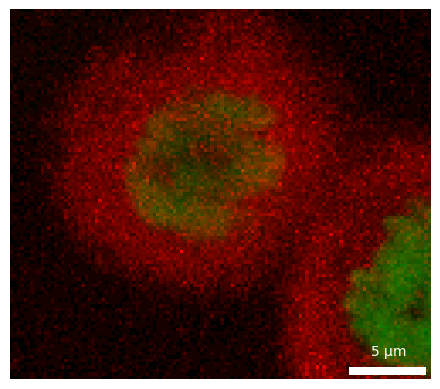

In [61]:
imp = read_msr_imps('tests/example/test-TZCYX.msr', config='meas118')

imp.show(reduce=np.max, scalebar=True)
imp.scales()
imp.save('test.tif')

In [ ]:
imp = ImagePlus.from_tif('test/example/tif-TZCYX-full.tif')
imp2 = imp.reduce('ZT', reduce={'ZT': np.max})

imp.show(reduce={'ZT': np.sum})
plt.show()
imp2.show()

In [ ]:
imp2 = imp.slice('Z', slice=np.argmax(imp.data('ZT', np.sum), axis=0), slice_list_axis='T')

imp.show(reduce={'T': 0, 'Z': np.max})
plt.show()
imp2.show(reduce=0)

In [ ]:
imp.show(reduce=np.max)
plt.show()

imp2 = imp.crop('XY', max=90, size=[80, 60])
print(imp.shape(), imp2.shape())

imp2.show(reduce=np.max)

In [ ]:
imp = ImagePlus.from_tif('test/example/tif-TZCYX-full.tif')
# imp.set_scales({'XY': (0.1, 'um'), 'T': (30, 's')})
# imp.set_labels(['Test', 'Test2'])

# print(imp.shape())
print(imp._labels)
# imp.set_scale('Y', 100, 'nm')
print(imp._scales)

fig, axs = plt.subplots(1, 3, figsize=(10,6))
for ax in axs: ax.axis('off')

package.set_merge_dtype(np.uint8)
imp.show(axs[0], axes='YX', reduce=np.max, channel='POLQ', cmap='M', colorbar=True)
imp.show(axs[1], axes='YX', reduce=np.max, channel='Hoechst', cmap='C', colorbar=True)

imp.show(axs[2], axes='YX', reduce=0, cmap='MC', vmin=32770, vmax=32780, scalebar=True)
imp.save('test-2.tif', cmap='MC', vmin=32770, vmax=32780)

fig.tight_layout()

In [ ]:
imp = ImagePlus.from_tif('test/example/imagej-TZYX-ch1.tif')
imp.set_labels(labels=None)
imp.show(reduce=0, cmap='gray', vmin=32770, vmax=32775)
imp.save('test.tif', cmap='hot', vmin=32770, vmax=32775)

In [ ]:
def read_tiftags(filename):
    with tif.TiffFile(filename) as file:
        tif_tags = {}
        for tag in file.pages[0].tags.values():
            name, value = tag.name, tag.value
            tif_tags[name] = value
        # image = file.pages[0].asarray()
    return tif_tags
def print_tiftags(filename):
    tif_tags = read_tiftags(filename)
    print('\n'.join([str((k, v)) for k,v in tif_tags.items()]))

In [ ]:
print_tiftags('test.tif')

In [ ]:
imp = ImagePlus.from_tif('test-2.tif')

print(imp._scales)
print(imp._labels)

imp.show(reduce=np.max, scalebar=True)

In [ ]:
[val for pair in zip([1, 3, 5], [2, 4, 6]) for val in pair]

In [ ]:
ImagePlus(np.zeros(1), 'TZ')

In [ ]:
list(None)